### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [1]:
library(ggplot2)

In [2]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [3]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [4]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [5]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


#### Data preparation

**To prepare the data, copies are made of the New York, Washington, and Chicago datasets, and the three copies are combined to make one large dataset called combined.ds. In order to combine the datasets, the column names must match, so Gender and Birth.Year columns are added to the Washington copy so that the datasets can be combined.** 

**Month and Day columns are created and added to combined.ds. The columns are created by extracting the month and day of the week from Start.Time. Two rows have a Month or Day column with a value of 'NA,' so those two rows are removed.**

In [6]:
# Make copies of datasets
ny.copy = ny
wash.copy = wash
chi.copy = chi

In [7]:
# Add Gender column and Birth.Year column to Washington and check
wash.copy[,'Gender'] = "NA"
wash.copy[, 'Birth.Year'] = "NA"

head(wash.copy)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber,NA,NA
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber,NA,NA
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber,NA,NA
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer,NA,NA
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber,NA,NA
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber,NA,NA


In [8]:
# Number of rows in each dataset and combined datasets for later check
print("Rows in NY:")
    nrow(ny.copy)
print("Rows in Washington:")
    nrow(wash.copy)
print("Rows in Chicago:")
    nrow(chi.copy)

print("NY + Chicago:") 
    nrow(ny.copy) + nrow(chi.copy)
print("NY + Washington + Chicago:") 
    nrow(ny.copy) + nrow(wash.copy) + nrow(chi.copy)

[1] "Rows in NY:"


[1] 54770

[1] "Rows in Washington:"


[1] 89051

[1] "Rows in Chicago:"


[1] 8630

[1] "NY + Chicago:"


[1] 63400

[1] "NY + Washington + Chicago:"


[1] 152451

In [9]:
# rbind the 3 datasets together into combined.ds
combined.ds = rbind(ny.copy, chi.copy)
combined.ds = rbind(combined.ds, wash.copy)

# check number of rows
nrow(combined.ds)

[1] 152451

In [10]:
# Extract month from Start.Time and make new column called Month for combined.ds
combined.mon = months(as.Date(combined.ds[,2]))

# Add new column called Month to combined.ds
combined.ds = cbind(combined.ds, Month = combined.mon)
head(combined.ds)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,Month
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,June
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,May
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,March
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,May
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,June
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,February


In [11]:
# Extract day of the week from Start.Time and make new column called Day for combined.ds
combined.day = weekdays(as.Date(combined.ds[,2]))

# Add new column called Day to combined.ds
combined.ds = cbind(combined.ds, Day = combined.day)
head(combined.ds)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,Month,Day
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,June,Sunday
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,May,Thursday
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,March,Wednesday
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,May,Monday
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,June,Wednesday
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,February,Wednesday


In [12]:
# Show null values: There is one NA in Month and one NA in day.
summary(combined.ds)

       X                         Start.Time                    End.Time     
 Min.   :      7   2017-02-19 12:19:00:     6   2017-03-09 17:54:00:     7  
 1st Qu.: 589310   2017-02-20 11:35:00:     6   2017-03-28 18:11:00:     7  
 Median :1184899   2017-02-24 17:46:00:     6   2017-01-13 17:48:00:     6  
 Mean   :1781625   2017-03-01 08:20:00:     6   2017-01-31 08:49:00:     6  
 3rd Qu.:2085970   2017-03-02 08:39:00:     6   2017-02-13 18:09:00:     6  
 Max.   :6816152   2017-03-09 17:31:00:     6   2017-02-20 11:38:00:     6  
                   (Other)            :152415   (Other)            :152413  
 Trip.Duration                                  Start.Station   
 Min.   :     60   Columbus Circle / Union Station     :  1700  
 1st Qu.:    392   Lincoln Memorial                    :  1546  
 Median :    667   Jefferson Dr & 14th St SW           :  1488  
 Mean   :   1098   Massachusetts Ave & Dupont Circle NW:  1219  
 3rd Qu.:   1159   Jefferson Memorial                  :  1

In [13]:
# Omit rows with NA values in Month and Day columns
combined.ds <- subset(combined.ds, Month!='NA' & Day!='NA')

In [14]:
# Summary to show that there are no NA values in Month and Day columns
summary(combined.ds)

       X                         Start.Time                    End.Time     
 Min.   :      7   2017-02-19 12:19:00:     6   2017-03-09 17:54:00:     7  
 1st Qu.: 589318   2017-02-20 11:35:00:     6   2017-03-28 18:11:00:     7  
 Median :1184902   2017-02-24 17:46:00:     6   2017-01-13 17:48:00:     6  
 Mean   :1781636   2017-03-01 08:20:00:     6   2017-01-31 08:49:00:     6  
 3rd Qu.:2085996   2017-03-02 08:39:00:     6   2017-02-13 18:09:00:     6  
 Max.   :6816152   2017-03-09 17:31:00:     6   2017-02-20 11:38:00:     6  
                   (Other)            :152414   (Other)            :152412  
 Trip.Duration                                  Start.Station   
 Min.   :     60   Columbus Circle / Union Station     :  1700  
 1st Qu.:    392   Lincoln Memorial                    :  1546  
 Median :    667   Jefferson Dr & 14th St SW           :  1488  
 Mean   :   1098   Massachusetts Ave & Dupont Circle NW:  1219  
 3rd Qu.:   1159   Jefferson Memorial                  :  1

In [15]:
# The row with NA values has been removed
nrow(combined.ds)

[1] 152450

### Question 1


**What is the most common month to use bikeshare?**

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.


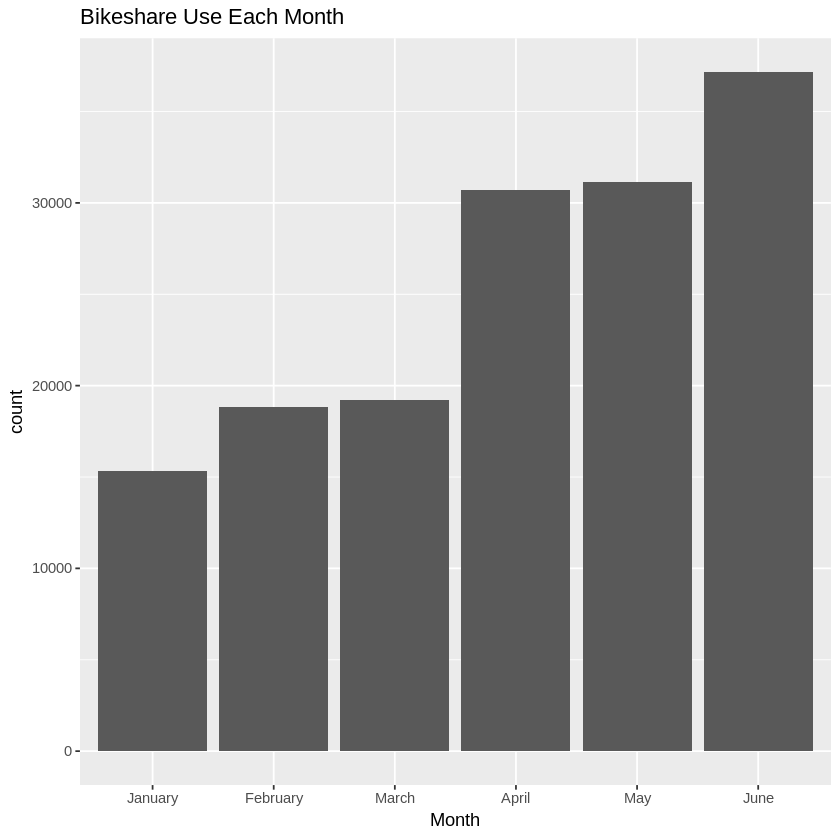

In [16]:
# Number of total uses each month
ggplot(aes(x=Month), data=combined.ds) + 
    geom_histogram(stat="count") +
    ggtitle("Bikeshare Use Each Month ") +
    scale_x_discrete(limits = month.name) +
    xlim("January", "February", "March", "April", "May", "June")

**The datasets cover six months of Bikeshare use, January through June, so a limitation of this data is the limited time period sampled. The data show an increase in use over the six months. January is the low point at about 15000 uses. March shows slightly more use than February, but February and March are nearly equal at just under 20000 uses. April and May show nearly equal use at a little over 30000 uses, although Bikeshare gets slightly more use in May than in April. Bikeshare gets the most use in June with around 38000 uses.**

### Question 2

**What is the most common day of the week to use bikeshare?**

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

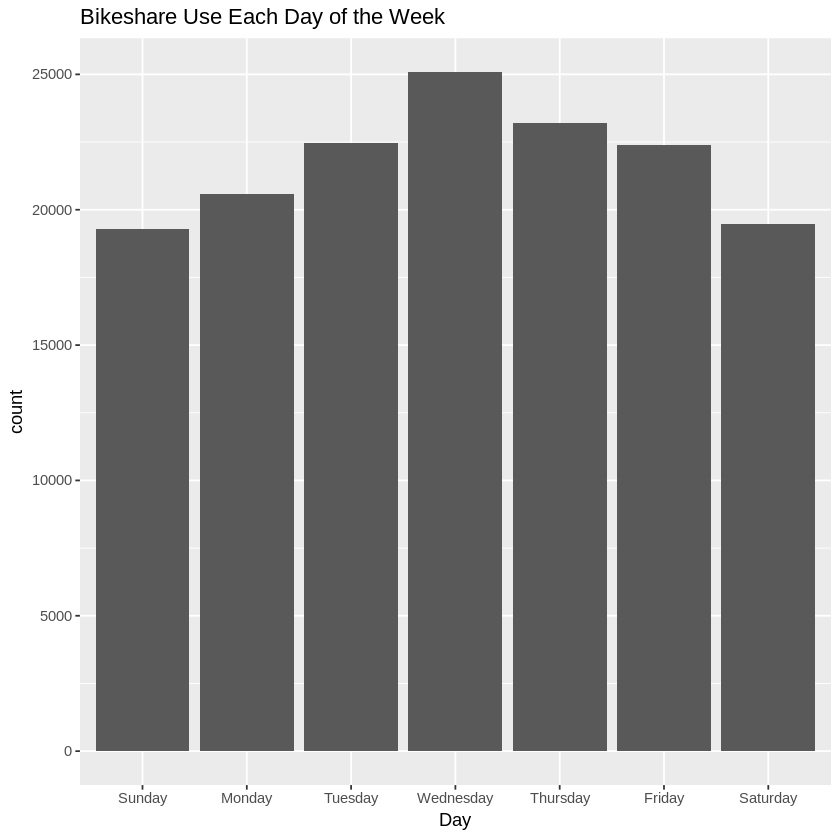

In [17]:
# # Number of total uses each day of the week
ggplot(aes(x=Day), data=combined.ds) + 
    geom_histogram(stat="count") +
    ggtitle("Bikeshare Use Each Day of the Week") +
    xlim("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday")

**Bikeshare use is at its lowest point on Sunday, about 19000 uses. On each subsequent day Bikeshare use climbs until Wednesday, where it has the most use at 25000 uses. After Wednesday, each day has a declining number of uses until the lowest number of uses on Sunday. Saturday has just slightly more uses, about 19500, than Sunday so fewer Bikeshare trips are taken on weekends than during the work week.**

### Question 3

**What is the most common day of the week in each month to use bikeshare?**

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

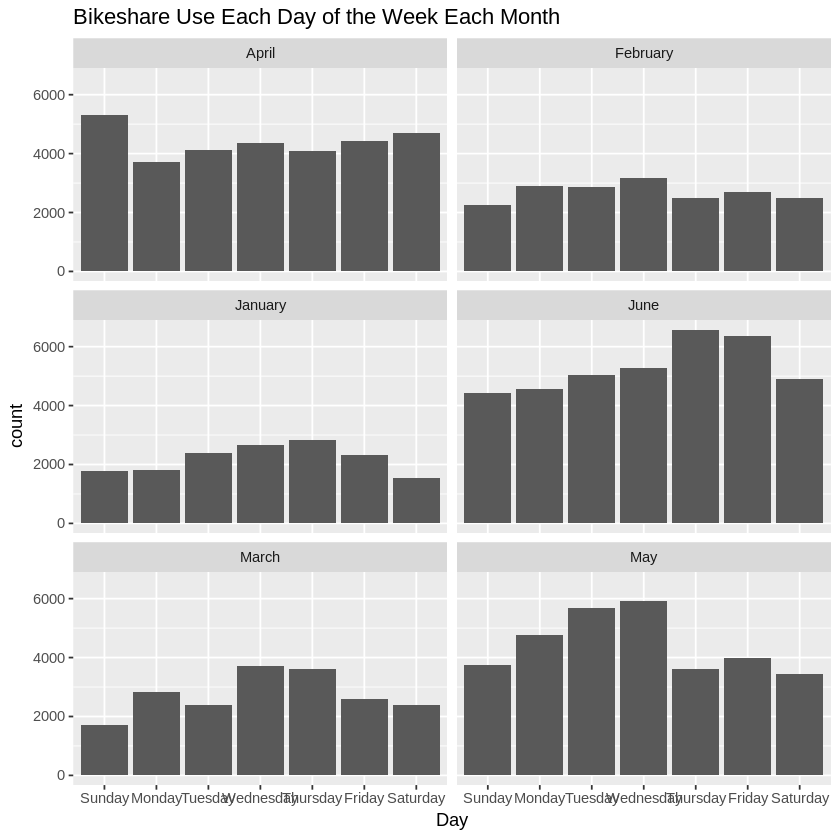

In [18]:
# Your solution code goes here
ggplot(aes(x = Day), data = combined.ds) +
    geom_histogram(stat="count") +
    ggtitle("Bikeshare Use Each Day of the Week Each Month") +
    xlim("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday") +
    facet_wrap(~Month, ncol = 2)

**January, February, and March follow a pattern of Bikeshare use that peaks midweek, Wednesday or Thursday, and gets the least use on the weekends. January gets the least usage, never rising above 3000 uses. April is an outlier with Sunday getting the most use, around 5500 uses, followed by Saturday, getting about 4700 uses. In May, the low points are Thursday through Sunday with 4000 or fewer uses, followed by a gradual increase through the Wednesday peak at 6000 uses. In June, daily use does not sink below 4500. Thursday is the usage highpoint, but both Thursday and Friday get over 6000 uses. Sunday is the low point in June with about 4500 uses.**

**In summary, the the most common day of the week in each month to use bikeshare is as follows:**
<li>January = Thursday</li>
<li>February = Wednesday</li>
<li>March = Wednesday</li>
<li>April = Sunday</li>
<li>May = Wednesday</li>
<li>June = Thursday</li>


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [19]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')